다중회귀(Multiple Regression) : 여러개의 변수, 특성을 사용하는 것이 다중회귀.<br>
다항회귀와 다중회귀는 서로다름.<br>
1) 다항회귀 : 독립변수의 차수를 높이는 형태<br>
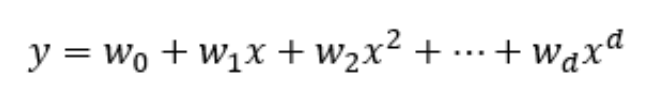
2) 다중회귀 : 다중의 독립변수가 있는 형태.<br>
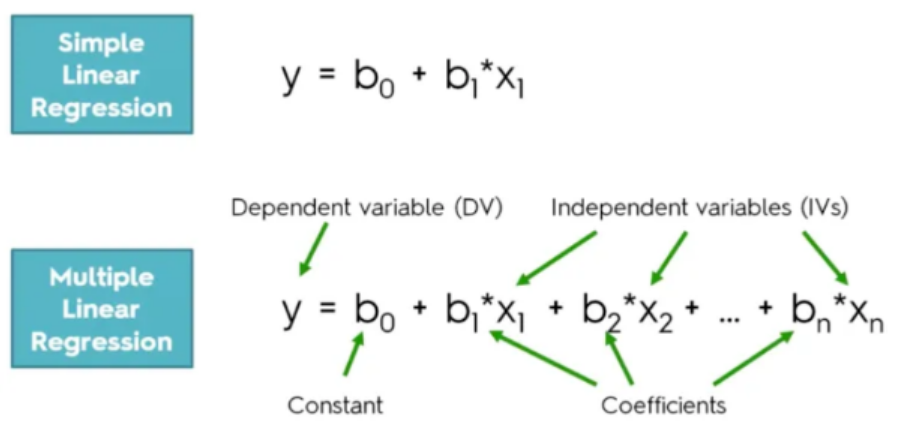<br>


특성이 1개면 선형회귀 모델은 직선 기울기를 학습하는 반면, 특성이 2개 이상인 선형회귀는 평면 기울기를 학습함.<br>
타겟 = a*특성1 + b*특성2 + c*특성3 + 절편

In [1]:
#라이브러리 및 학습 데이터 호출
import pandas as pd

df = pd.read_csv("https://bit.ly/perch_csv_data")
print(f"불러온 로우데이터\n{df.head(3)}")
print("\n")
#불러온 데이터프레임을 넘파이로 변환
perch_full = df.to_numpy()
print(f"로우데이터 배열로 변환\n{perch_full[:3]}")
print(f"로우데이터 배열 타입 :{perch_full.ndim}")
print(f"로우데이터 배열 형태 :{perch_full.shape}")

불러온 로우데이터
   length   height   width
0     8.4     2.11    1.41
1    13.7     3.53    2.00
2    15.0     3.82    2.43


로우데이터 배열로 변환
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]]
로우데이터 배열 타입 :2
로우데이터 배열 형태 :(56, 3)


불러온 학습용 로우데이터는 속성이 3개인 다중속성으로 길이, 높이, 두께로 구분되어 있음

In [2]:
#라이브러리 및 타겟 데이터 호출
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )
print(f"로우데이터 배열로 변환\n{perch_weight[:3]}")
print(f"로우데이터 배열 타입 :{perch_weight.ndim}")
print(f"로우데이터 배열 형태 :{perch_weight.shape}")

로우데이터 배열로 변환
[ 5.9 32.  40. ]
로우데이터 배열 타입 :1
로우데이터 배열 형태 :(56,)


불러온 타겟용 로우데이터는 무게로만 구성된 데이터임

In [3]:
#트레이닝, 테스트 세트 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

print(f"트레이닝 데이터\n{train_input[:5]}")
print("\n")
print(f"트레이닝 데이터 길이\n{len(train_input)}")
print("\n")
print(f"트레이닝 타겟데이터\n{train_target[:5]}")
print("\n")
print(f"트레이닝 타겟데이터 길이\n{len(train_target)}")
print("\n")
print(f"테스트데이터\n{test_input[:5]}")
print("\n")
print(f"테스트데이터 길이\n{len(test_input)}")
print(f"테스트 타겟데이터\n{test_target[:5]}")
print(f"테스트 타겟데이터 길이\n{len(test_target)}")

트레이닝 데이터
[[23.5   6.28  3.72]
 [21.    5.92  3.31]
 [39.   11.14  7.49]
 [40.   11.14  6.63]
 [22.    6.11  3.41]]


트레이닝 데이터 길이
42


트레이닝 타겟데이터
[170. 115. 900. 820. 120.]


트레이닝 타겟데이터 길이
42


테스트데이터
[[36.5  10.88  6.86]
 [43.   12.51  7.42]
 [20.    5.08  2.77]
 [27.5   7.05  4.34]
 [23.    5.22  3.63]]


테스트데이터 길이
14
테스트 타겟데이터
[ 685. 1100.   85.  265.  150.]
테스트 타겟데이터 길이
14


In [4]:
from sklearn.linear_model import LinearRegression
#선형회귀 알고리즘 객체 생성
lr = LinearRegression()
#학습
lr.fit(train_input,train_target)
#점수확인
print(f"트레이닝 데이터 학습점수 : {lr.score(train_input,train_target)}")
print(f"테스트 데이터 학습점수 : {lr.score(test_input,test_target)}")

트레이닝 데이터 학습점수 : 0.9527801343674887
테스트 데이터 학습점수 : 0.9038048378407446


테스트 데이터 학습점수를 보니 과소적합이 발생함. 이에 따라 트레이닝 속성을 늘려 재학습을 진행하였음.<br>
사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공하는 데 이러한 클래스들을 활용하여  제공속성을 늘리는 작업을 진행함.<br>
다중특성을 만들기위해 우리는 변환기라는 것을 사용할 수 있음<br>

In [5]:
from sklearn.preprocessing import PolynomialFeatures

#변환기 생성
poly = PolynomialFeatures(include_bias=False)  #y절편을 빼기 위해 include_bias=False 기재
#변환 시행
poly.fit(train_input)

train_poly = poly.transform(train_input) #기존 트레이닝 데이터 변환
test_poly = poly.transform(test_input) #기존 테스트 데이터 변환

print(f"기존 트레이닝 데이터\n{train_input[:3]}")
print(f"기존 트레이닝 데이터 형태{train_input.shape}")
print("\n")
print(f"변환후 트레이닝 데이터\n{train_poly[:3]}")
print(f"변환후 트레이닝 데이터 형태{train_poly.shape}")
print("\n")
print(f"기존 테스트 데이터\n{test_input[:3]}")
print(f"기존 테스트 데이터 형태{test_input.shape}")
print("\n")
print(f"변환후 테스트 데이터\n{test_poly[:3]}")
print(f"변환후 테스트 데이터 형태{test_poly.shape}")
print("\n")
#변환기를 통해 새로 생성된 특성
poly.get_feature_names_out()

기존 트레이닝 데이터
[[23.5   6.28  3.72]
 [21.    5.92  3.31]
 [39.   11.14  7.49]]
기존 트레이닝 데이터 형태(42, 3)


변환후 트레이닝 데이터
[[  23.5       6.28      3.72    552.25    147.58     87.42     39.4384
    23.3616   13.8384]
 [  21.        5.92      3.31    441.      124.32     69.51     35.0464
    19.5952   10.9561]
 [  39.       11.14      7.49   1521.      434.46    292.11    124.0996
    83.4386   56.1001]]
변환후 트레이닝 데이터 형태(42, 9)


기존 테스트 데이터
[[36.5  10.88  6.86]
 [43.   12.51  7.42]
 [20.    5.08  2.77]]
기존 테스트 데이터 형태(14, 3)


변환후 테스트 데이터
[[  36.5      10.88      6.86   1332.25    397.12    250.39    118.3744
    74.6368   47.0596]
 [  43.       12.51      7.42   1849.      537.93    319.06    156.5001
    92.8242   55.0564]
 [  20.        5.08      2.77    400.      101.6      55.4      25.8064
    14.0716    7.6729]]
변환후 테스트 데이터 형태(14, 9)




array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

변환기를 통해 새로 생성된 특성은 6개이며, x0은 첫번째 특성을 의미하고 x0^2는 첫번 째 특성의 제곱, x0 x1은 첫번째 특성과 두번째 특성의 곱을 나타냄.<br>

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9907817311327972
0.9449195172644917


그렇다면 속성을 늘리면 점수가 더올라갈까?라는 의문이 생겨, 신규속성을 만들기위해 위에서 진행한 변환기를 사용해 5 제곱까지 특성을 만들어 출력을함

In [7]:
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(f"기존 트레이닝 데이터\n{train_input[:3]}")
print(f"기존 트레이닝 데이터 형태{train_input.shape}")
print("\n")
print(f"변환후 트레이닝 데이터\n{train_poly[:3]}")
print(f"변환후 트레이닝 데이터 형태{train_poly.shape}")
print("\n")
print(f"기존 테스트 데이터\n{test_input[:3]}")
print(f"기존 테스트 데이터 형태{test_input.shape}")
print("\n")
print(f"변환후 테스트 데이터\n{test_poly[:3]}")
print(f"변환후 테스트 데이터 형태{test_poly.shape}")
print("\n")
#변환기를 통해 새로 생성된 특성
poly.get_feature_names_out()

기존 트레이닝 데이터
[[23.5   6.28  3.72]
 [21.    5.92  3.31]
 [39.   11.14  7.49]]
기존 트레이닝 데이터 형태(42, 3)


변환후 트레이닝 데이터
[[2.35000000e+01 6.28000000e+00 3.72000000e+00 5.52250000e+02
  1.47580000e+02 8.74200000e+01 3.94384000e+01 2.33616000e+01
  1.38384000e+01 1.29778750e+04 3.46813000e+03 2.05437000e+03
  9.26802400e+02 5.48997600e+02 3.25202400e+02 2.47673152e+02
  1.46710848e+02 8.69051520e+01 5.14788480e+01 3.04980062e+05
  8.15010550e+04 4.82776950e+04 2.17798564e+04 1.29014436e+04
  7.64225640e+03 5.82031907e+03 3.44770493e+03 2.04227107e+03
  1.20975293e+03 1.55538739e+03 9.21344125e+02 5.45764355e+02
  3.23287165e+02 1.91501315e+02 7.16703147e+06 1.91527479e+06
  1.13452583e+06 5.11826625e+05 3.03183925e+05 1.79593025e+05
  1.36777498e+05 8.10210658e+04 4.79933702e+04 2.84291938e+04
  3.65516038e+04 2.16515869e+04 1.28254623e+04 7.59724839e+03
  4.50028089e+03 9.76783284e+03 5.78604111e+03 3.42740015e+03
  2.03024340e+03 1.20262826e+03 7.12384890e+02]
 [2.10000000e+01 5.92000000e+00 3

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

5제곱까지 특성을 늘려 변환기를 활용한 전처리를 하였더니 속성이 무려 55개까지 생성됨.

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9999999999959719
-124456.78150912422


테스트 데이터 학습점수는 99%인 반면, 테스트 데이터 학습점수는 엄청나게 떨어졌음.<br>
행 수 보다 속성 수가 많아, 과대적합이 발생된 것으로 예상되어, 조치가 필요하다고 생각됨.<br>
과대적합을 해결하기위해 규제가 필요하다고 판단했고 규제를 위해 Ridge, Lasso 모델을 적용하기로함.<br>
규제 : 머신러닝 모델이 훈련세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말함. 즉, 훈련세트에 과대적합이 되지 않도록 많는 것으로 선형 회귀모델의 경우 특성에 곱해지는 계수 또는 기울기의 크기를 작게 만든 작업임.<br>
*규제를 가하기전 평균과 표준편차를 직접 구해 특성을 표준점수로 바꾸어주는 데이터 스케일링 작업이 필요함. 이에 따라 StrandardScaler 클래스를 사용함.

In [9]:
#규제 전에 표준화 필요 : 데이터 스케일링 (표준점수로 변환시키는 변환기)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

print(f"스케일링 전 트레이닝 데이터\n{train_poly[:2]}")
print("\n")
print(f"스케일링 후 트레이닝 데이터\n{train_scaled[:2]}")
print("\n")
print(f"스케일링 전 테스트 데이터\n{test_poly[:2]}")
print("\n")
print(f"스케일링 후 테스트 데이터\n{test_scaled[:2]}")

스케일링 전 트레이닝 데이터
[[2.35000000e+01 6.28000000e+00 3.72000000e+00 5.52250000e+02
  1.47580000e+02 8.74200000e+01 3.94384000e+01 2.33616000e+01
  1.38384000e+01 1.29778750e+04 3.46813000e+03 2.05437000e+03
  9.26802400e+02 5.48997600e+02 3.25202400e+02 2.47673152e+02
  1.46710848e+02 8.69051520e+01 5.14788480e+01 3.04980062e+05
  8.15010550e+04 4.82776950e+04 2.17798564e+04 1.29014436e+04
  7.64225640e+03 5.82031907e+03 3.44770493e+03 2.04227107e+03
  1.20975293e+03 1.55538739e+03 9.21344125e+02 5.45764355e+02
  3.23287165e+02 1.91501315e+02 7.16703147e+06 1.91527479e+06
  1.13452583e+06 5.11826625e+05 3.03183925e+05 1.79593025e+05
  1.36777498e+05 8.10210658e+04 4.79933702e+04 2.84291938e+04
  3.65516038e+04 2.16515869e+04 1.28254623e+04 7.59724839e+03
  4.50028089e+03 9.76783284e+03 5.78604111e+03 3.42740015e+03
  2.03024340e+03 1.20262826e+03 7.12384890e+02]
 [2.10000000e+01 5.92000000e+00 3.31000000e+00 4.41000000e+02
  1.24320000e+02 6.95100000e+01 3.50464000e+01 1.95952000e+01
  1.09

Ridge<br>
가중치가 많아지는 것을 Ridge로 규제함.<br>
가중치^2(모델파라미터)를 규제하는 것을 L2 규제라고 부름

In [10]:
from sklearn.linear_model import Ridge
#릿지모델 생성
ridge = Ridge()
#학습
ridge.fit(train_scaled,train_target)
#트레이닝, 테스트 점수확인
print(f"트레이닝 데이터 학습점수 : {ridge.score(train_scaled,train_target)}")
print(f"테스트 데이터 학습점수 : {ridge.score(test_scaled,test_target)}")

트레이닝 데이터 학습점수 : 0.9888364173128606
테스트 데이터 학습점수 : 0.9844910299007886


릿지와 라쏘모델을 사용할 때 규제의 양을 임의로 조절할 수 있음<br>
이때 조절하는 요소를 하이퍼파라미터라고 부르는데, 우리는 alpha값이 크면 규제 강도가 세지므로 계수값을 더 줄이고 조금 더 과소 적합되도록 유도할 수 있음.<br>
alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 커짐

In [11]:
import matplotlib.pyplot as plt

train_score = list()
test_score = list()

alpha_list = [0.001, 0.01, 0.1, 1, 10 , 100] #6개의 alpha 값을 만들어 최적의 alpha 값을 찾음

for v in alpha_list:
    ridge = Ridge(alpha=v) #릿지모델생성
    ridge.fit(train_scaled,train_target) #트레이닝 세트 훈련
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    print(f"알파값\t:\t{v}")
    print(f"트레이닝 점수\t:\t{ridge.score(train_scaled, train_target)}")
    print(f"테스트 점수\t:\t{ridge.score(test_scaled, test_target)}")
    print(f"트레이닝 - 테스트 점수\t:\t{ridge.score(train_scaled, train_target) - ridge.score(test_scaled, test_target)}")
    print("\n")



알파값	:	0.001
트레이닝 점수	:	0.9942360477984351
테스트 점수	:	0.9259776092525587
트레이닝 - 테스트 점수	:	0.06825843854587643


알파값	:	0.01
트레이닝 점수	:	0.9927782713158156
테스트 점수	:	0.9762719821144298
트레이닝 - 테스트 점수	:	0.01650628920138586


알파값	:	0.1
트레이닝 점수	:	0.99034467941652
테스트 점수	:	0.9866013218053848
트레이닝 - 테스트 점수	:	0.0037433576111352007


알파값	:	1
트레이닝 점수	:	0.9888364173128606
테스트 점수	:	0.9844910299007886
트레이닝 - 테스트 점수	:	0.0043453874120720215


알파값	:	10
트레이닝 점수	:	0.987765150814168
테스트 점수	:	0.9801934100351235
트레이닝 - 테스트 점수	:	0.007571740779044545


알파값	:	100
트레이닝 점수	:	0.9829075451631881
테스트 점수	:	0.9733948817186266
트레이닝 - 테스트 점수	:	0.009512663444561476




좀더 명확한 알파값을 파악하기 위해 시각화를 해보자.<br>
alpha_list에 있는 6개의 값을 동일한 간격으로 표시하기위해 로그함수를 활용하여 시각화 진행.

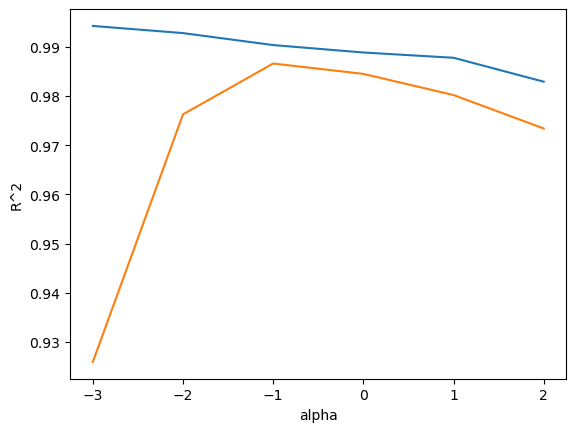

In [12]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

최적의 alpha 값은 간격이 좁은 -1로 보임.

In [13]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target) 
print(f"트레이닝 점수\t:\t{ridge.score(train_scaled, train_target)}")
print(f"테스트 점수\t:\t{ridge.score(test_scaled, test_target)}")

트레이닝 점수	:	0.99034467941652
테스트 점수	:	0.9866013218053848


Lasso<br>
가중치의 절대값을 규제하는데 이를 L1 규제라고 부름<br>
계수의 크기를 아예 0으로 만들수 있음

In [14]:
from sklearn.linear_model import Lasso #가중치의 절대값을 규제를 가함 L1규제
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9889193582956533
0.9846734648756486


alpha값을 조정하여 점수를 좀더 올려보자.

In [15]:
train_score = list()
test_score = list()

alpha_list = [0.001, 0.01, 0.1, 1, 10 , 100]

for v in alpha_list:
    lasso = Lasso(alpha=v, max_iter=10000) #라쏘모델생성
    lasso.fit(train_scaled,train_target) #트레이닝 세트 훈련
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    print(f"알파값\t:\t{v}")
    print(f"트레이닝 점수\t:\t{lasso.score(train_scaled, train_target)}")
    print(f"테스트 점수\t:\t{lasso.score(test_scaled, test_target)}")
    print(f"트레이닝 - 테스트 점수\t:\t{lasso.score(train_scaled, train_target) - lasso.score(test_scaled, test_target)}")
    print("\n")



알파값	:	0.001
트레이닝 점수	:	0.993671340204054
테스트 점수	:	0.9647983477443773
트레이닝 - 테스트 점수	:	0.028872992459676672


알파값	:	0.01
트레이닝 점수	:	0.9934523232558028
테스트 점수	:	0.9655136417952612
트레이닝 - 테스트 점수	:	0.02793868146054157


알파값	:	0.1
트레이닝 점수	:	0.9908746524821995
테스트 점수	:	0.986265277283672
트레이닝 - 테스트 점수	:	0.004609375198527554


알파값	:	1
트레이닝 점수	:	0.9889764022314798
테스트 점수	:	0.9846685515142114
트레이닝 - 테스트 점수	:	0.004307850717268358


알파값	:	10
트레이닝 점수	:	0.9880020946728711
테스트 점수	:	0.9849248973701401
트레이닝 - 테스트 점수	:	0.0030771973027310384


알파값	:	100
트레이닝 점수	:	0.8978164257943042
테스트 점수	:	0.9059254391407962
트레이닝 - 테스트 점수	:	-0.008109013346491944




c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.439e+04, tolerance: 4.635e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+04, tolerance: 4.635e+02
  model = cd_fast.enet_coordinate_descent(


좀더 명확한 알파값을 파악하기 위해 시각화를 해보자.<br>
alpha_list에 있는 6개의 값을 동일한 간격으로 표시하기위해 로그함수를 활용하여 시각화 진행.

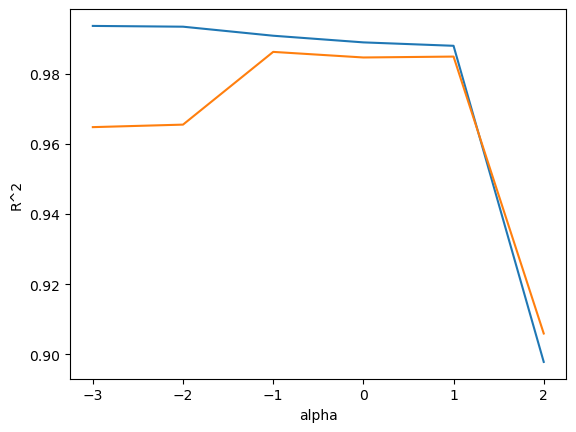

In [16]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

최적의 alph 값은 1로 이는 10^1 = 10 임. 따라서 alpha 값에 10을 넣어 규제를 가함과 동시에 라쏘모델을 학습함

In [17]:
#라쏘 모델생성
lasso = Lasso(alpha=10)
#라쏘 학습
lasso.fit(train_scaled,train_target)
print(f"트레이닝 점수\t:\t{lasso.score(train_scaled, train_target)}")
print(f"테스트 점수\t:\t{lasso.score(test_scaled, test_target)}")

트레이닝 점수	:	0.9880238229427257
테스트 점수	:	0.9851127104411733


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.141e+02, tolerance: 4.635e+02
  model = cd_fast.enet_coordinate_descent(


In [18]:
#계수 값을 아예 0으로 만들기
print(np.sum(lasso.coef_ == 0))

44
